## __Imports and Preliminary Analysis__

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [2]:
all_data = pd.read_csv('data/all_exchanges_data_cleaned.csv')

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19958 entries, 0 to 19957
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            19958 non-null  object 
 1   Open            19958 non-null  float64
 2   High            19958 non-null  float64
 3   Low             19958 non-null  float64
 4   Close           19958 non-null  float64
 5   Adj Close       19958 non-null  float64
 6   Volume          19958 non-null  float64
 7   Percent Change  19958 non-null  float64
 8   Index           19958 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.4+ MB


Somehow the 'datetime' convserion done in the datacleaning step seems to have been reversed. Possibly occured during the data merging

In [4]:
all_data['Date'] = pd.to_datetime(all_data['Date'], format='%Y-%m-%d')

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19958 entries, 0 to 19957
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            19958 non-null  datetime64[ns]
 1   Open            19958 non-null  float64       
 2   High            19958 non-null  float64       
 3   Low             19958 non-null  float64       
 4   Close           19958 non-null  float64       
 5   Adj Close       19958 non-null  float64       
 6   Volume          19958 non-null  float64       
 7   Percent Change  19958 non-null  float64       
 8   Index           19958 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.4+ MB


In [6]:
all_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
0,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,212070000.0,-0.416612,Dow Jones Industrial
1,2000-10-10,1036.500000,1036.500000,1036.500000,1036.500000,1036.500000,0.0,0.408801,Euronext100
2,2000-10-10,15739.389648,15739.389648,15434.740234,15554.110352,15554.110352,0.0,-0.888200,Hang Seng
3,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,324520000.0,-1.050990,Dow Jones Industrial
4,2000-10-11,1009.489990,1009.489990,1009.489990,1009.489990,1009.489990,0.0,-2.605886,Euronext100


Only Dow Jones Data provides volume numbers, the rest are null, drop entire column

In [7]:
all_data = all_data.drop(['Volume'], axis = 1)

In [59]:
all_data.head(2)

,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
0,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,-0.416612,Dow Jones Industrial
1,2000-10-10,1036.500000,1036.500000,1036.500000,1036.500000,1036.500000,0.408801,Euronext100


In [9]:
all_data.shape

(19958, 8)

In [10]:
all_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Percent Change',
       'Index'],
      dtype='object')

## __Split by Indexes__

In [11]:
DJI = all_data.loc[all_data['Index'] == 'Dow Jones Industrial']
N100 = all_data.loc[all_data['Index'] == 'Euronext100']
HSI = all_data.loc[all_data['Index'] == 'Hang Seng']
N225 = all_data.loc[all_data['Index'] == 'Nikkei 225']

In [12]:
###Reset Indexes for Good Measure
DJI = DJI.reset_index(drop=True)
HSI = HSI.reset_index(drop=True)
N100 = N100.reset_index(drop=True)
N225 = N225.reset_index(drop=True)

run some heads to make sure index is matched correctly

In [13]:
HSI.head(5)

,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
0,2000-10-10,15739.389648,15739.389648,15434.740234,15554.110352,15554.110352,-0.888200,Hang Seng
1,2000-10-11,15376.620117,15376.620117,15073.950195,15127.000000,15127.000000,-2.745965,Hang Seng
2,2000-10-12,15071.919922,15244.650391,14883.320313,15074.799805,15074.799805,-0.345080,Hang Seng
3,2000-10-13,14679.990234,14786.040039,14494.379883,14680.500000,14680.500000,-2.615622,Hang Seng
4,2000-10-16,15185.679688,15284.650391,14956.879883,14973.400391,14973.400391,1.995166,Hang Seng


In [14]:
DJI.head(5)

,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
0,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,-0.416612,Dow Jones Industrial
1,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,-1.050990,Dow Jones Industrial
2,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,-3.641421,Dow Jones Industrial
3,2000-10-13,10031.620117,10208.089844,10014.240234,10192.179688,10192.179688,1.570565,Dow Jones Industrial
4,2000-10-16,10184.780273,10272.089844,10177.759766,10238.799805,10238.799805,0.457411,Dow Jones Industrial


__Plot Closing Price Trend With Multipliers To Bring Four Indices Data More Visually In Line With Each Other__

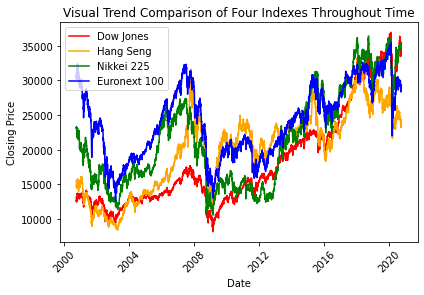

In [15]:
plt.plot(DJI['Date'], DJI['Close'] * 1.25, color='red', label='Dow Jones')
plt.plot(HSI['Date'], HSI['Close'], color='orange', label='Hang Seng')
plt.plot(N225['Date'], N225['Close'] * 1.5, color='green', label='Nikkei 225')
plt.plot(N100['Date'], N100['Close'] * 30, color='blue', label='Euronext 100')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Visual Trend Comparison of Four Indexes Throughout Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

__Plot Percent Change as Time Series__

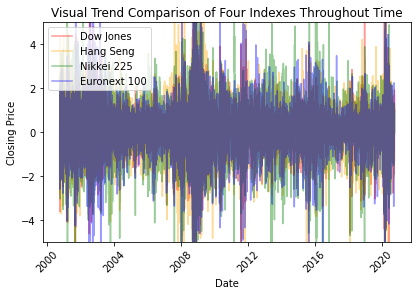

In [16]:
plt.plot('Date', 'Percent Change', data=DJI, color='red', label='Dow Jones', alpha=0.4)
plt.plot('Date', 'Percent Change', data=HSI, color='orange', label='Hang Seng', alpha=0.4)
plt.plot('Date', 'Percent Change', data=N225, color='green', label='Nikkei 225', alpha=0.4)
plt.plot('Date', 'Percent Change', data=N100, color='blue', label='Euronext 100', alpha=0.4)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Visual Trend Comparison of Four Indexes Throughout Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.ylim(-5,5)
plt.show()

Does not visually provide much information

## __Split by Number of Date Occurences__

In [17]:
oneday = pd.DataFrame()
twoday = pd.DataFrame()
threeday = pd.DataFrame()
fourday = pd.DataFrame()

In [18]:
val_cts = (all_data['Date']).value_counts()

In [19]:
val_cts.head(5)

2017-08-28    4
2012-02-22    4
2006-06-08    4
2001-11-13    4
2005-07-12    4
Name: Date, dtype: int64

In [20]:
val_cts.shape

(5203,)

In [21]:
oneday = all_data[all_data.Date.isin(val_cts[val_cts == 1].index)]
twoday = all_data[all_data.Date.isin(val_cts[val_cts == 2].index)]
threeday = all_data[all_data.Date.isin(val_cts[val_cts == 3].index)]
fourday = all_data[all_data.Date.isin(val_cts[val_cts == 4].index)]

In [22]:
oneday.head(5)

,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
212,2000-12-25,13597.570313,13931.610352,13597.570313,13931.610352,13931.610352,3.757558,Nikkei 225
508,2001-04-13,13454.870117,13578.639648,13291.200195,13385.719727,13385.719727,0.249238,Nikkei 225
547,2001-04-30,10814.410156,10906.410156,10712.190430,10734.969727,10734.969727,-0.694540,Dow Jones Industrial
1203,2001-12-25,10359.219727,10359.219727,10178.870117,10254.809570,10254.809570,-0.780233,Nikkei 225
1454,2002-03-29,11350.349609,11389.599609,11024.940430,11024.940430,11024.940430,-2.719200,Nikkei 225


In [23]:
twoday.head(6)

,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
126,2000-11-23,1022.549988,1022.549988,1022.549988,1022.549988,1022.549988,0.999575,Euronext100
127,2000-11-23,14416.679688,14579.900391,14257.540039,14563.509766,14563.509766,-1.414790,Hang Seng
213,2000-12-26,10638.209961,10701.160156,10597.639648,10692.440430,10692.440430,0.534818,Dow Jones Industrial
214,2000-12-26,13878.519531,14019.730469,13794.429688,14007.849609,14007.849609,0.547239,Nikkei 225
509,2001-04-16,10118.160156,10184.650391,10046.519531,10158.559570,10158.559570,0.312228,Dow Jones Industrial
510,2001-04-16,13338.919922,13451.019531,13217.639648,13254.889648,13254.889648,-0.977385,Nikkei 225


In [24]:
threeday.head(9)

,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
0,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,-0.416612,Dow Jones Industrial
1,2000-10-10,1036.500000,1036.500000,1036.500000,1036.500000,1036.500000,0.408801,Euronext100
2,2000-10-10,15739.389648,15739.389648,15434.740234,15554.110352,15554.110352,-0.888200,Hang Seng
71,2000-11-03,10883.169922,10883.169922,10756.900391,10817.950195,10817.950195,-0.574969,Dow Jones Industrial
72,2000-11-03,1077.349976,1077.349976,1077.349976,1077.349976,1077.349976,0.154323,Euronext100
73,2000-11-03,15486.410156,15693.030273,15449.120117,15594.120117,15594.120117,1.978742,Hang Seng
227,2001-01-02,10790.919922,10797.019531,10585.360352,10646.150391,10646.150391,-1.314794,Dow Jones Industrial
228,2001-01-02,982.219971,982.219971,982.219971,982.219971,982.219971,-1.507148,Euronext100
229,2001-01-02,15089.849609,15089.849609,14865.660156,14869.940430,14869.940430,-1.494415,Hang Seng


In [25]:
fourday.head(16)

,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
3,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,-1.050990,Dow Jones Industrial
4,2000-10-11,1009.489990,1009.489990,1009.489990,1009.489990,1009.489990,-2.605886,Euronext100
5,2000-10-11,15376.620117,15376.620117,15073.950195,15127.000000,15127.000000,-2.745965,Hang Seng
6,2000-10-11,15795.150391,15795.150391,15424.709961,15513.570313,15513.570313,-1.984805,Nikkei 225
7,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,-3.641421,Dow Jones Industrial
8,2000-10-12,1015.780029,1015.780029,1015.780029,1015.780029,1015.780029,0.623091,Euronext100
9,2000-10-12,15071.919922,15244.650391,14883.320313,15074.799805,15074.799805,-0.345080,Hang Seng
10,2000-10-12,15491.799805,15580.320313,15392.740234,15550.639648,15550.639648,0.238948,Nikkei 225
11,2000-10-13,10031.620117,10208.089844,10014.240234,10192.179688,10192.179688,1.570565,Dow Jones Industrial
12,2000-10-13,1022.469971,1022.469971,1022.469971,1022.469971,1022.469971,0.658601,Euronext100


In [26]:
oneday.reset_index(inplace=True)
twoday.reset_index(inplace=True)
threeday.reset_index(inplace=True)
fourday.reset_index(inplace=True)

__By Number of Date Occurences Preliminary Analysis__

In [27]:
print(oneday.shape,twoday.shape,threeday.shape,fourday.shape)

(48, 9) (140, 9) (1710, 9) (18060, 9)


In [28]:
print(fourday.count()/all_data.count())

Adj Close         0.9049
Close             0.9049
Date              0.9049
High              0.9049
Index             0.9049
Low               0.9049
Open              0.9049
Percent Change    0.9049
index                NaN
dtype: float64


In [29]:
print(threeday.count()/all_data.count())

Adj Close         0.08568
Close             0.08568
Date              0.08568
High              0.08568
Index             0.08568
Low               0.08568
Open              0.08568
Percent Change    0.08568
index                 NaN
dtype: float64


In [30]:
oneday['Index'].value_counts()

Nikkei 225              40
Dow Jones Industrial     5
Euronext100              3
Name: Index, dtype: int64

In [31]:
twoday['Index'].value_counts()

Dow Jones Industrial    61
Nikkei 225              52
Euronext100             20
Hang Seng                7
Name: Index, dtype: int64

In [32]:
threeday['Index'].value_counts()

Euronext100             569
Dow Jones Industrial    449
Hang Seng               403
Nikkei 225              289
Name: Index, dtype: int64

90.49% Of the days in the sample contain data from all four indices <br>
8.57% Of the days in the sample contain data from only three indices <br>
Combined that is around 99% of the dataset. <br>
It would be safe to drop the rows of the days that only contain one or two indices of data. <br>
It would also be plausible to work on only the days which contain all four indices. Must investigate further. <br>
Three day value counts shows Nikkei to have around half three day values of Euronext. Dow and Hang Send have similar amounts and are not too far from Euro count.

## __Split By Percent Change__

In [33]:
DJI_pct = pd.DataFrame(index=np.arange(len(DJI['Date'])), columns=['Date', 'Percent Change'])
DJI_pct['Percent Change'] = 100.00
N100_pct = pd.DataFrame(index=np.arange(len(N100['Date'])), columns=['Date', 'Percent Change'])
N100_pct['Percent Change'] = 100.00
HSI_pct = pd.DataFrame(index=np.arange(len(HSI['Date'])), columns=['Date', 'Percent Change'])
HSI_pct['Percent Change'] = 100.00
N225_pct = pd.DataFrame(index=np.arange(len(N225['Date'])), columns=['Date', 'Percent Change'])
N225_pct['Percent Change'] = 100.00


In [34]:
print(DJI_pct.shape,HSI_pct.shape,N100_pct.shape,N225_pct.shape)

(5030, 2) (4925, 2) (5107, 2) (4896, 2)


In [35]:
for i in range (len(DJI['Date'])):
        DJI_pct.loc[i,'Date'] = DJI['Date'][i]
        if i != 0:
             DJI_pct.loc[i,'Percent Change'] = DJI_pct['Percent Change'][i - 1] + ((DJI['Percent Change'][i] / 100) * DJI_pct['Percent Change'][i - 1])
for i in range (len(HSI['Date'])):
        HSI_pct.loc[i,'Date'] = HSI['Date'][i]
        if i != 0:
             HSI_pct.loc[i,'Percent Change'] = HSI_pct['Percent Change'][i - 1] + ((HSI['Percent Change'][i] / 100) * HSI_pct['Percent Change'][i - 1])
for i in range (len(N100['Date'])):
    N100_pct.loc[i,'Date'] = N100['Date'][i]
    if i != 0:
        N100_pct.loc[i,'Percent Change'] = N100_pct['Percent Change'][i - 1] + ((N100['Percent Change'][i] / 100) * N100_pct['Percent Change'][i - 1])
for i in range (len(N225['Date'])):
    N225_pct.loc[i,'Date'] = N225['Date'][i]
    if i != 0:
        N225_pct.loc[i,'Percent Change'] = N225_pct['Percent Change'][i - 1] + ((N225['Percent Change'][i] / 100) * N225_pct['Percent Change'][i - 1])

In [36]:
N100_pct.head(5)

,Date,Percent Change
0,2000-10-10 00:00:00,100.000000
1,2000-10-11 00:00:00,97.394114
2,2000-10-12 00:00:00,98.000968
3,2000-10-13 00:00:00,98.646403
4,2000-10-16 00:00:00,99.071877


In [37]:
N225_pct.head(5)

,Date,Percent Change
0,2000-10-11 00:00:00,100.000000
1,2000-10-12 00:00:00,100.238948
2,2000-10-13 00:00:00,98.818707
3,2000-10-16 00:00:00,99.991943
4,2000-10-17 00:00:00,98.882587


__Plot by percent change + Moving Averages using rolling mean__

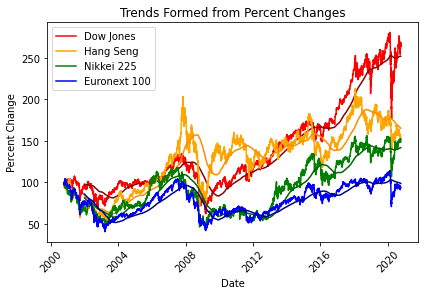

In [38]:
plt.plot(DJI_pct['Date'], DJI_pct['Percent Change'], color='red', label='Dow Jones')
plt.plot(DJI_pct['Date'], DJI_pct['Percent Change'].rolling(300).mean(), color='darkred')
plt.plot(HSI_pct['Date'], HSI_pct['Percent Change'], color='orange', label='Hang Seng')
plt.plot(HSI_pct['Date'], HSI_pct['Percent Change'].rolling(300).mean(), color='darkorange')
plt.plot(N225_pct['Date'], N225_pct['Percent Change'], color='green', label='Nikkei 225')
plt.plot(N225_pct['Date'], N225_pct['Percent Change'].rolling(300).mean(), color='darkgreen')
plt.plot(N100_pct['Date'], N100_pct['Percent Change'], color='blue', label='Euronext 100')
plt.plot(N100_pct['Date'], N100_pct['Percent Change'].rolling(300).mean(), color='darkblue')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Trends Formed from Percent Changes')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

__Same plot but with logarithm scale 2__

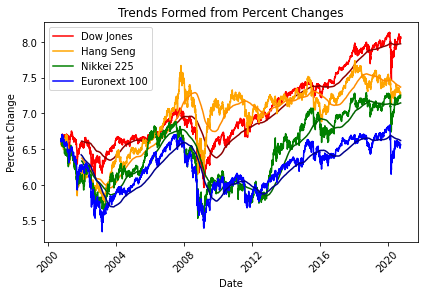

In [39]:
plt.plot(DJI_pct['Date'], np.log2(DJI_pct['Percent Change']), color='red', label='Dow Jones')
plt.plot(DJI_pct['Date'], np.log2(DJI_pct['Percent Change']).rolling(300).mean(), color='darkred')
plt.plot(HSI_pct['Date'], np.log2(HSI_pct['Percent Change']), color='orange', label='Hang Seng')
plt.plot(HSI_pct['Date'], np.log2(HSI_pct['Percent Change']).rolling(300).mean(), color='darkorange')
plt.plot(N225_pct['Date'], np.log2(N225_pct['Percent Change']), color='green', label='Nikkei 225')
plt.plot(N225_pct['Date'], np.log2(N225_pct['Percent Change']).rolling(300).mean(), color='darkgreen')
plt.plot(N100_pct['Date'], np.log2(N100_pct['Percent Change']), color='blue', label='Euronext 100')
plt.plot(N100_pct['Date'], np.log2(N100_pct['Percent Change']).rolling(300).mean(), color='darkblue')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Trends Formed from Percent Changes')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

__Snapshot of the above chart zoomed for the year 2008-2009__

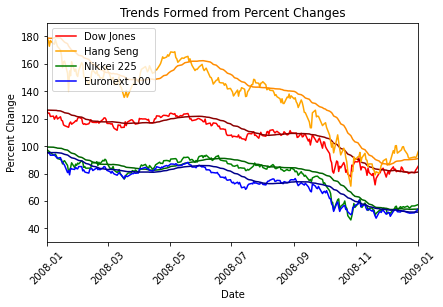

In [40]:
plt.plot(DJI_pct['Date'], DJI_pct['Percent Change'], color='red', label='Dow Jones')
plt.plot(DJI_pct['Date'], DJI_pct['Percent Change'].rolling(30).mean(), color='darkred')
plt.plot(HSI_pct['Date'], HSI_pct['Percent Change'], color='orange', label='Hang Seng')
plt.plot(HSI_pct['Date'], HSI_pct['Percent Change'].rolling(30).mean(), color='darkorange')
plt.plot(N225_pct['Date'], N225_pct['Percent Change'], color='green', label='Nikkei 225')
plt.plot(N225_pct['Date'], N225_pct['Percent Change'].rolling(30).mean(), color='darkgreen')
plt.plot(N100_pct['Date'], N100_pct['Percent Change'], color='blue', label='Euronext 100')
plt.plot(N100_pct['Date'], N100_pct['Percent Change'].rolling(30).mean(), color='darkblue')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Trends Formed from Percent Changes')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlim(datetime.date(2008, 1, 1),datetime.date(2009, 1, 1))
plt.ylim(30,190)
plt.xticks(rotation=45)
plt.show()

__Same snapshot as above but in log2__

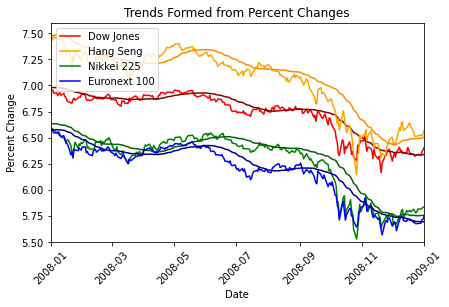

In [41]:
plt.plot(DJI_pct['Date'], np.log2(DJI_pct['Percent Change']), color='red', label='Dow Jones')
plt.plot(DJI_pct['Date'], np.log2(DJI_pct['Percent Change']).rolling(30).mean(), color='darkred')
plt.plot(HSI_pct['Date'], np.log2(HSI_pct['Percent Change']), color='orange', label='Hang Seng')
plt.plot(HSI_pct['Date'], np.log2(HSI_pct['Percent Change']).rolling(30).mean(), color='darkorange')
plt.plot(N225_pct['Date'], np.log2(N225_pct['Percent Change']), color='green', label='Nikkei 225')
plt.plot(N225_pct['Date'], np.log2(N225_pct['Percent Change']).rolling(30).mean(), color='darkgreen')
plt.plot(N100_pct['Date'], np.log2(N100_pct['Percent Change']), color='blue', label='Euronext 100')
plt.plot(N100_pct['Date'], np.log2(N100_pct['Percent Change']).rolling(30).mean(), color='darkblue')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Trends Formed from Percent Changes')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlim(datetime.date(2008, 1, 1),datetime.date(2009, 1, 1))
plt.ylim(5.5,7.6)
plt.show()

__Three Month Snapshot__

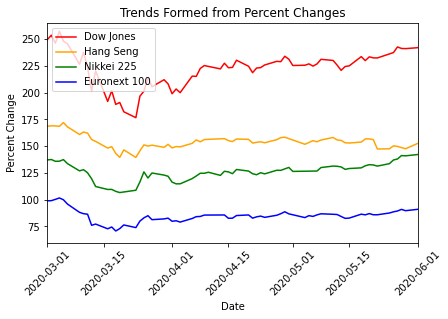

In [42]:
plt.plot(DJI_pct['Date'], DJI_pct['Percent Change'], color='red', label='Dow Jones')
plt.plot(HSI_pct['Date'], HSI_pct['Percent Change'], color='orange', label='Hang Seng')
plt.plot(N225_pct['Date'], N225_pct['Percent Change'], color='green', label='Nikkei 225')
plt.plot(N100_pct['Date'], N100_pct['Percent Change'], color='blue', label='Euronext 100')
#At this point there is not enough data for a meaningful moving average
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Trends Formed from Percent Changes')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlim(datetime.date(2020, 3, 1),datetime.date(2020, 6, 1))
plt.xticks(rotation=45)
plt.ylim(60,265)
plt.show()

Across all the snapshots, visually there is a visible correlation between the four indices with regards to its closing price percent change.

In [43]:
#Percent change across all data mean and standard distribution
pct_mean = np.mean(all_data['Percent Change'])
pct_std = np.std(all_data['Percent Change'], ddof=1)
print(pct_mean, pct_std)

0.018234870238536708 1.3686941371188048


__Plot Distributon of Daily Percent Change__

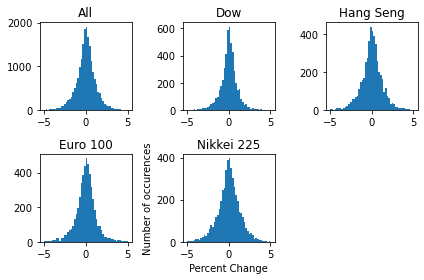

In [44]:
plt.subplot(2,3,1)
plt.hist(all_data['Percent Change'], bins=50, range=[-5,5])
plt.title('All')
plt.subplot(2,3,2)
plt.hist(DJI['Percent Change'], bins=50, range=[-5,5])
plt.title('Dow')
plt.subplot(2,3,3)
plt.hist(HSI['Percent Change'], bins=50, range=[-5,5])
plt.title('Hang Seng')
plt.subplot(2,3,4)
plt.hist(N100['Percent Change'], bins=50, range=[-5,5])
plt.title('Euro 100')
plt.subplot(2,3,5)
plt.hist(N225['Percent Change'], bins=50, range=[-5,5])
plt.title('Nikkei 225')
plt.xlabel('Percent Change')
plt.ylabel('Number of occurences')
plt.tight_layout()

Distributions all look like a Double Exponential Distribution. How do they look if log is applied to it?

__Daily Percent Change Distribution using Log 2__

/usr/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


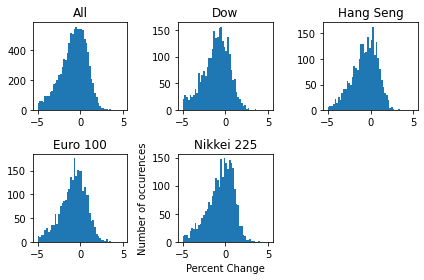

In [45]:
plt.subplot(2,3,1)
plt.hist(np.log2(all_data['Percent Change']), bins=50, range=[-5,5])
plt.title('All')
plt.subplot(2,3,2)
plt.hist(np.log2(DJI['Percent Change']), bins=50, range=[-5,5])
plt.title('Dow')
plt.subplot(2,3,3)
plt.hist(np.log2(HSI['Percent Change']), bins=50, range=[-5,5])
plt.title('Hang Seng')
plt.subplot(2,3,4)
plt.hist(np.log2(N100['Percent Change']), bins=50, range=[-5,5])
plt.title('Euro 100')
plt.subplot(2,3,5)
plt.hist(np.log2(N225['Percent Change']), bins=50, range=[-5,5])
plt.title('Nikkei 225')
plt.xlabel('Percent Change')
plt.ylabel('Number of occurences')
plt.tight_layout()

They look negatively skewed, as visually characterized by the steep right side slope.

In [46]:
#Skew
print('All:', all_data['Percent Change'].skew(axis=0), ' DJI:',
      DJI['Percent Change'].skew(axis=0), ' HSI:',
      HSI['Percent Change'].skew(axis=0), ' N100:',
      N100['Percent Change'].skew(axis=0), ' N225:',
      N225['Percent Change'].skew(axis=0))

All: -0.049907422906426274  DJI: -0.1004338233469546  HSI: 0.15931731371632968  N100: -0.0753006280472631  N225: -0.18672038362662075


Skew calculation confirms the visualized distribution pattern

In [47]:
#Kurtosis
print('All:', all_data['Percent Change'].kurtosis(axis=0), ' DJI:',
      DJI['Percent Change'].kurtosis(axis=0), ' HSI:',
      HSI['Percent Change'].kurtosis(axis=0), ' N100:',
      N100['Percent Change'].kurtosis(axis=0), ' N225:',
      N225['Percent Change'].kurtosis(axis=0))

All: 8.514629998881347  DJI: 13.351334807136386  HSI: 8.695590970304547  N100: 7.053009888748691  N225: 6.390840178345659


Excessively positive Kurtosis values re-affirm the visual leptokurtic distribution shown in the non-log histograms

## __Split By Index Solely with Four Day__

In [48]:
fourday.head(5)

,index,Date,Open,High,Low,Close,Adj Close,Percent Change,Index
0,3,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,-1.050990,Dow Jones Industrial
1,4,2000-10-11,1009.489990,1009.489990,1009.489990,1009.489990,1009.489990,-2.605886,Euronext100
2,5,2000-10-11,15376.620117,15376.620117,15073.950195,15127.000000,15127.000000,-2.745965,Hang Seng
3,6,2000-10-11,15795.150391,15795.150391,15424.709961,15513.570313,15513.570313,-1.984805,Nikkei 225
4,7,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,-3.641421,Dow Jones Industrial


In [49]:
pvt_four_pct = fourday.pivot(index='Date', columns='Index', values=['Percent Change'])
pvt_four_pct.head(5)

Percent Change                                 
Index      Dow Jones Industrial Euronext100 Hang Seng Nikkei 225
Date                                                            
2000-10-11            -1.050990   -2.605886 -2.745965  -1.984805
2000-10-12            -3.641421    0.623091 -0.345080   0.238948
2000-10-13             1.570565    0.658601 -2.615622  -1.416855
2000-10-16             0.457411    0.431312  1.995166   1.187261
2000-10-17            -1.456126   -0.527811 -0.667655  -1.109445

In [50]:
pvt_four_open = fourday.pivot(index='Date', columns='Index', values=['Open'])
pvt_four_close = fourday.pivot(index='Date', columns='Index', values=['Close'])
pvt_four_high = fourday.pivot(index='Date', columns='Index', values=['High'])
pvt_four_low = fourday.pivot(index='Date', columns='Index', values=['Low'])
pvt_four_adj = fourday.pivot(index='Date', columns='Index', values=['Adj Close'])
pvt_four_high.head(5)

High                                         
Index      Dow Jones Industrial  Euronext100     Hang Seng    Nikkei 225
Date                                                                    
2000-10-11         10566.580078  1009.489990  15376.620117  15795.150391
2000-10-12         10460.400391  1015.780029  15244.650391  15580.320313
2000-10-13         10208.089844  1022.469971  14786.040039  15516.150391
2000-10-16         10272.089844  1026.880005  15284.650391  15688.169922
2000-10-17         10293.919922  1021.460022  15134.530273  15545.059570

In [51]:
pvt_four = fourday.pivot(index='Date', columns='Index', values=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Percent Change'])
pvt_four.head(5)

Open                                           \
Index      Dow Jones Industrial  Euronext100     Hang Seng    Nikkei 225   
Date                                                                       
2000-10-11         10521.070313  1009.489990  15376.620117  15795.150391   
2000-10-12         10424.139648  1015.780029  15071.919922  15491.799805   
2000-10-13         10031.620117  1022.469971  14679.990234  15516.150391   
2000-10-16         10184.780273  1026.880005  15185.679688  15366.809570   
2000-10-17         10242.870117  1021.460022  15081.759766  15526.990234   

                           High                                           \
Index      Dow Jones Industrial  Euronext100     Hang Seng    Nikkei 225   
Date                                                                       
2000-10-11         10566.580078  1009.489990  15376.620117  15795.150391   
2000-10-12         10460.400391  1015.780029  15244.650391  15580.320313   
2000-10-13         10208.089844  1022.469971  14786.040039  15516.150391   
2000-10-16         10272.089844  1026.880005  15284.650391  15688.169922   
2000-10-17         10293.919922  1021.460022  15134.530273  15545.059570   

                            Low               ...         Close                \
Index      Dow Jones Industrial  Euronext100  ...     Hang Seng    Nikkei 225   
Date                                          ...                               
2000-10-11         10350.889648  1009.489990  ...  15127.000000  15513.570313   
2000-10-12         10023.490234  1015.780029  ...  15074.799805  15550.639648   
2000-10-13         10014.240234  1022.469971  ...  14680.500000  15330.309570   
2000-10-16         10177.759766  1026.880005  ...  14973.400391  15512.320313   
2000-10-17         10026.450195  1021.460022  ...  14873.429688  15340.219727   

                      Adj Close                                           \
Index      Dow Jones Industrial  Euronext100     Hang Seng    Nikkei 225   
Date                                                                       
2000-10-11         10413.790039  1009.489990  15127.000000  15513.570313   
2000-10-12         10034.580078  1015.780029  15074.799805  15550.639648   
2000-10-13         10192.179688  1022.469971  14680.500000  15330.309570   
2000-10-16         10238.799805  1026.880005  14973.400391  15512.320313   
2000-10-17         10089.709961  1021.460022  14873.429688  15340.219727   

                 Percent Change                                   
Index      Dow Jones Industrial Euronext100 Hang Seng Nikkei 225  
Date                                                              
2000-10-11            -1.050990   -2.605886 -2.745965  -1.984805  
2000-10-12            -3.641421    0.623091 -0.345080   0.238948  
2000-10-13             1.570565    0.658601 -2.615622  -1.416855  
2000-10-16             0.457411    0.431312  1.995166   1.187261  
2000-10-17            -1.456126   -0.527811 -0.667655  -1.109445  

[5 rows x 24 columns]

## __Plot Correlations Charts by Index__

__Percent Change__

<AxesSubplot:xlabel='None-Index', ylabel='None-Index'>

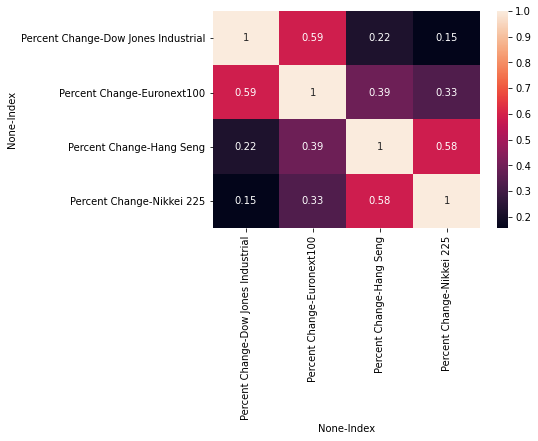

In [52]:
sns.heatmap(pvt_four_pct.corr(), annot=True)

__Open__

<AxesSubplot:xlabel='None-Index', ylabel='None-Index'>

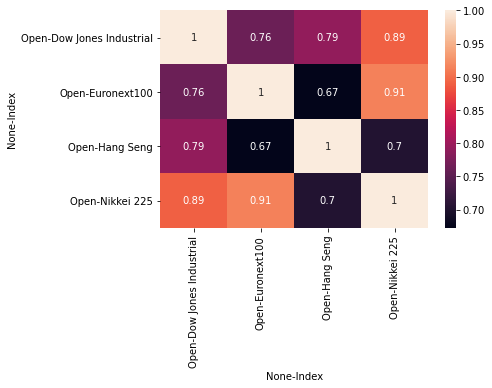

In [53]:
sns.heatmap(pvt_four_open.corr(), annot=True)

__Close__

<AxesSubplot:xlabel='None-Index', ylabel='None-Index'>

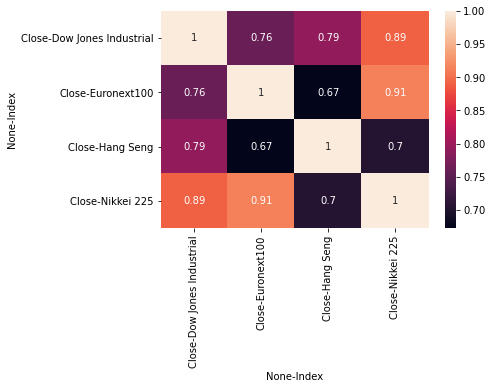

In [54]:
sns.heatmap(pvt_four_close.corr(), annot=True)

__High__

<AxesSubplot:xlabel='None-Index', ylabel='None-Index'>

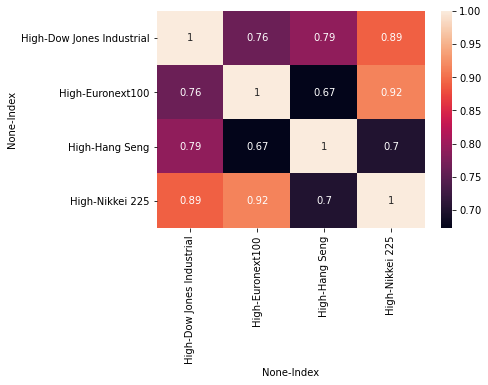

In [55]:
sns.heatmap(pvt_four_high.corr(), annot=True)

__Low__

<AxesSubplot:xlabel='None-Index', ylabel='None-Index'>

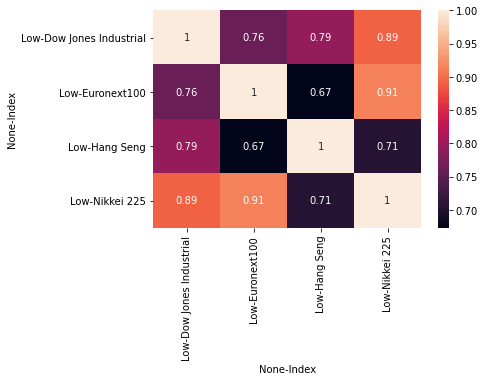

In [56]:
sns.heatmap(pvt_four_low.corr(), annot=True)

__Adj Close__

<AxesSubplot:xlabel='None-Index', ylabel='None-Index'>

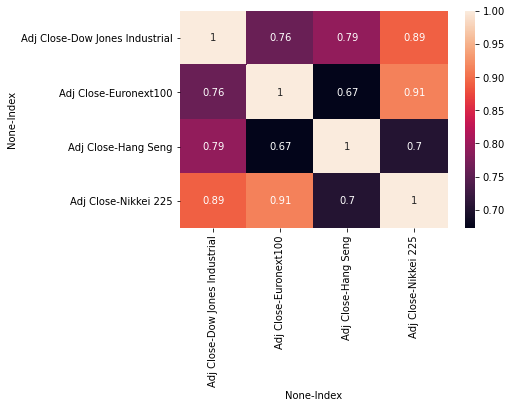

In [57]:
sns.heatmap(pvt_four_adj.corr(), annot=True)

__All Indicies and Columns__

<AxesSubplot:xlabel='None-Index', ylabel='None-Index'>

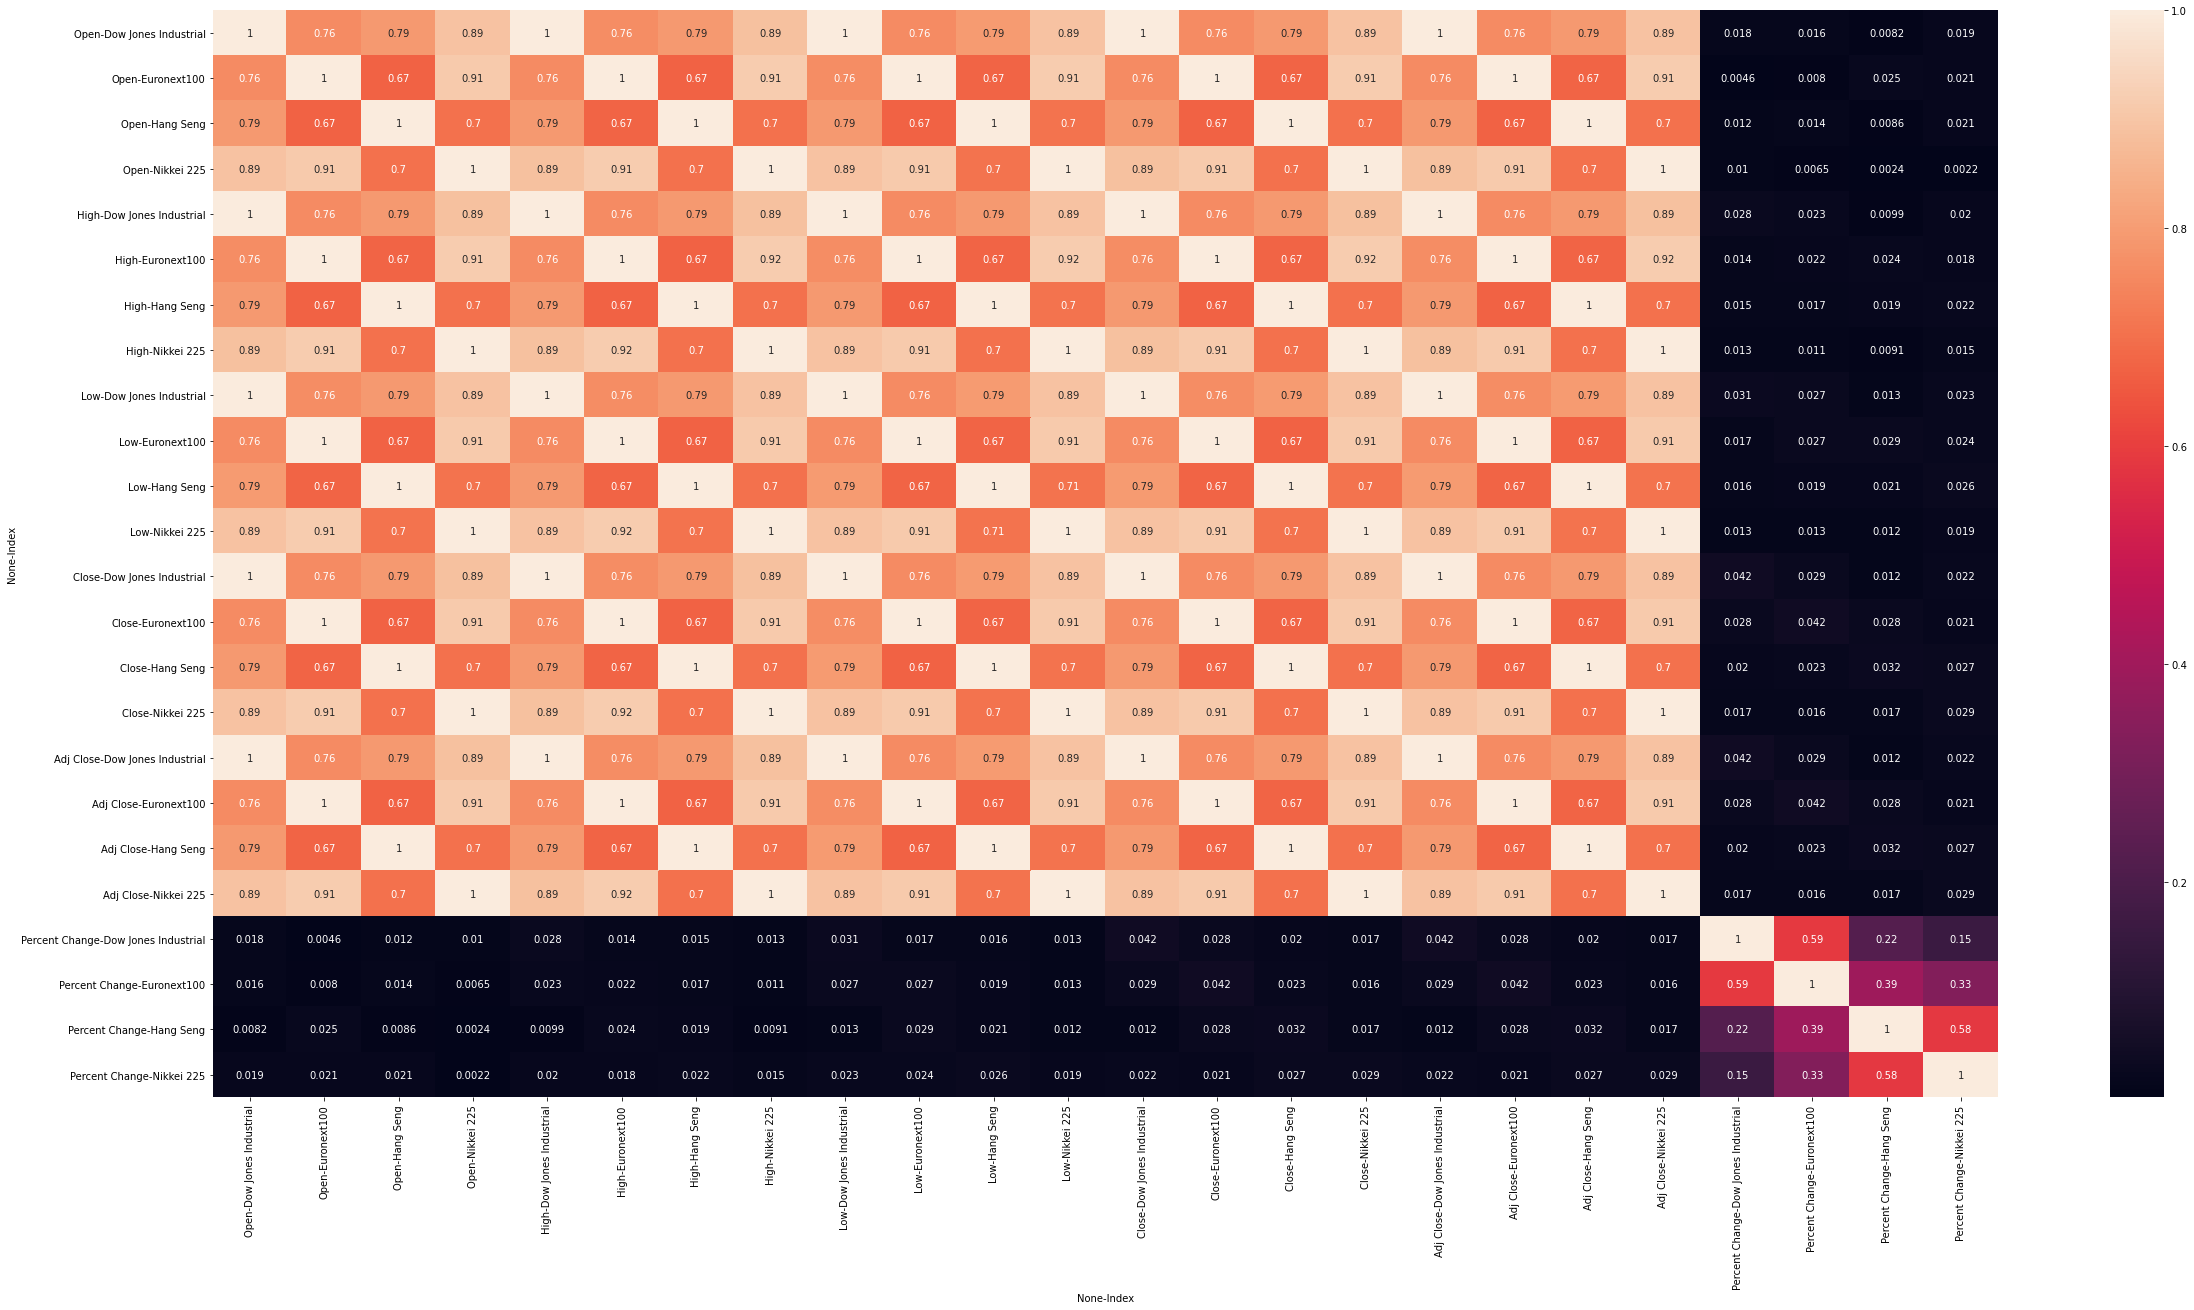

In [58]:
plt.figure(figsize=(40,20))
sns.heatmap(pvt_four.corr(), annot=True)

In [60]:
datapath = 'data'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [62]:
datapath_fourday = os.path.join(datapath, 'fourday.csv')
if not os.path.exists(datapath_fourday):
    fourday.to_csv(datapath_fourday, index=False)